# boardgames review prediction 

using linear regression and random forest algorithm

1.importing required libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

2.importing data

In [18]:
df=pd.read_csv('data/game.csv')   

# visualization

(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

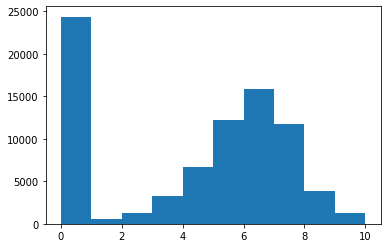

In [19]:
plt.hist(df['average_rating'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002682163B080>,
      dtype=object)

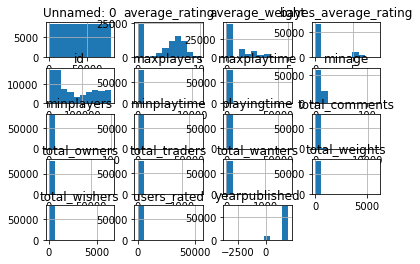

In [28]:
df.hist()

# checking correlation

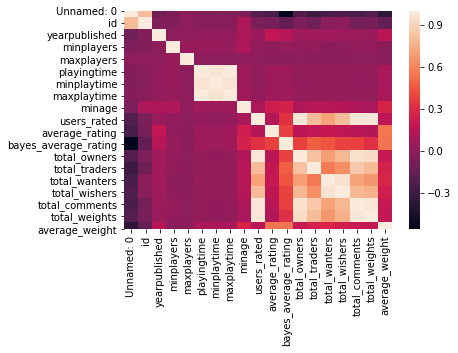

In [20]:
scatter=df.corr()
sns.heatmap(scatter)

In [21]:
df.dropna(inplace=True) # dropping null values if present 

In [22]:

columns=df.columns.tolist() 
columns=[c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]
train=df.sample(frac=0.8,random_state=1) #spliting data 
test=df.loc[~df.index.isin(train)]


3.performing linear regression

In [23]:
model_linreg=LinearRegression() #model creation

In [24]:
model_linreg.fit(train[columns], train['average_rating'])
predictions = model_linreg.predict(test[columns])
mean_squared_error(predictions, test['average_rating']) #mean_Squared_error

6.2450613488318805

4.performing randomforest regression

In [25]:
from sklearn.ensemble import RandomForestRegressor
model_randomforest = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
model_randomforest.fit(train[columns], train['average_rating'])
predictions = model_randomforest.predict(test[columns])
mean_squared_error(predictions, test['average_rating'])

0.717016161435438

# prediction

from linearregression model

In [26]:
model_linreg.predict(test[columns].iloc[100].values.reshape(1,-1))

array([8.27563179])

from random forest 

In [27]:
model_randomforest.predict(test[columns].iloc[100].values.reshape(1,-1))

array([7.70516914])